In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv(r"C:/Users/mail2/OneDrive/Desktop/Ml_Data/Bmi_male_female.csv")

In [4]:
data.head(1)

,Gender,Height,Weight,Index
0,Male,174,96,4


In [5]:
data.shape

(500, 4)

In [10]:
X_GHW=data.iloc[:,0:3]
Y_target=data.iloc[:,3]

In [11]:
#X_GHW

In [12]:
print("type of X_GHW {} and type of Y_target {}".format(type(X_GHW),type(Y_target)))

type of X_GHW <class 'pandas.core.frame.DataFrame'> and type of Y_target <class 'pandas.core.series.Series'>


In [14]:
X_GHW.head(1)

,Gender,Height,Weight
0,Male,174,96


In [19]:
#sb.countplot(x="Gender",data=data,hue='Index')
#plt.show()

In [20]:
#Encode male:0 ,feamle :1

In [25]:
X_GHW.Gender=X_GHW.Gender.map({"Male":0,"Female":1})

In [27]:
X_GHW.head(1)

,Gender,Height,Weight
0,0,174,96


# conveting data frame and series in to numpy array

In [28]:
XA=X_GHW.values
YA=Y_target.values

In [29]:
print("type of XA {} and YA {}".format(type(XA),type(YA)))

type of XA <class 'numpy.ndarray'> and YA <class 'numpy.ndarray'>


In [32]:
#Splitting the data into training and testing 

In [36]:
n=int(len(XA)*.70)
n

350

In [37]:
Xtrain=XA[:n]
Xtest=XA[n:]
Ytrain=YA[:n]
Ytest=YA[n:]

In [41]:
index_result=pd.Series(["Extremely Weak","Weak","Normal",
                        "Overweight","Obesity","Extreme Obesity"])

In [44]:
#index_result

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
trainer=KNeighborsClassifier(n_neighbors=5)
learner=trainer.fit(Xtrain,Ytrain)

In [43]:
i=learner.predict([[0,169,63]])
print(index_result[i])

2    Normal
dtype: object


In [45]:
#Testing the model

In [47]:
YP=learner.predict(Xtest)
YAct=Ytest

In [48]:
YavsYp=pd.DataFrame({"Ya":list(YAct),"Yp":list(YP)})

In [50]:
#YavsYp

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
acc=accuracy_score(YAct,YP)*100
acc

91.33333333333333

# k value (acc vs k)

In [69]:
Kmax=int(np.sqrt(len(X_GHW)))+1
krange=list(range(1,Kmax))

In [63]:
acc_list=[]
for i in range(1,Kmax):
    KNN_model=KNeighborsClassifier(n_neighbors=i)
    KNN_learner=KNN_model.fit(Xtrain,Ytrain)
    Ypmodel=KNN_learner.predict(Xtest)
    accModel=accuracy_score(Ypmodel,Ytest)
    acc_list.append(accModel)
    #print("Vale of  k is  {} and acc is {} ".format(i,accModel))

In [68]:
#np.array(acc_list).argmax()

In [71]:
#krange

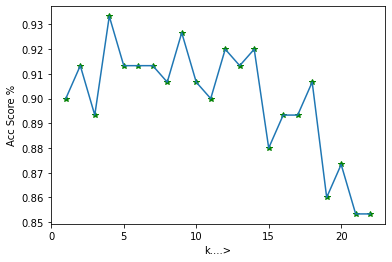

In [75]:
plt.plot(krange,acc_list,'g*')
plt.plot(krange,acc_list)
plt.xlabel("k....>")
plt.ylabel('Acc Score %')
plt.show()